<a href="https://colab.research.google.com/github/CJPJ007/Reinforcement-Learning/blob/master/Reinforcement_Learning_(Upper_Confidence_Bound)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv('/content/Ads_CTR_Optimisation.csv')
data.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [18]:
len(data),data.shape[1]

(10000, 10)

In [23]:
N=len(data)
d=data.shape[1]
number_of_selections=[0]*d
selection_award=[0]*d
total_reward=0
ads_selected=[]

In [24]:
for n in range(N):
  max_upper_bound=0
  ad=0
  for i in range(d):
    if number_of_selections[i]>0:
      average_reward=selection_award[i]/number_of_selections[i]
      delta=np.sqrt(3/2*np.log(n+1)/number_of_selections[i])
      #print(delta)
      upper_bound=delta+average_reward
    else:
      upper_bound=1e400
    
    if upper_bound>max_upper_bound:
      max_upper_bound=upper_bound
      ad=i

  ads_selected.append(ad)
  number_of_selections[ad]=number_of_selections[ad]+1
  selection_award[ad]=selection_award[ad]+data.values[n,ad]
  total_reward=total_reward+data.values[n,ad]

In [25]:
total_reward

2178

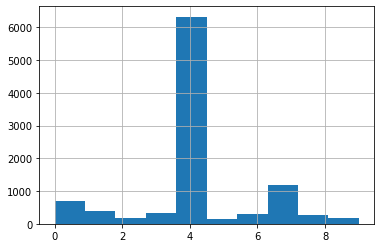

In [26]:
pd.Series(ads_selected).hist()